## <b> Lista 9  - algorytmy grafowe</b> ##

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import timeit

## Zadanie 1 - metody reprezentacji ##
- Zaimplementuj 3 sposoby reprezentacji grafu:
    - lista wierzchołków i krawędzi,
    - macierz sąsiedztwa,
    - macierz incydencji.

In [187]:
SIZE = 9

def generate_graph():
    """
    Funkcja generuje i zapisuje w 3 formach wierzchołki grafu i relacje między nimi
    :return tuple: (lista wierzchołków i krawędzi, macierz sąsiedztwa, macierz incydencji)
    """
    g_matrix = np.zeros((SIZE, SIZE))
    inc_matrix = []
    g_list = []

    for n in range(SIZE):
        # ustawienie zer na diagonali poprzez pętle od n+1
        for m in range(n + 1, SIZE):
            weight  = np.random.randint(0, 2)
            if weight and np.random.normal(1, 2) > 0:
                # macierz sąsiedstwa
                g_matrix[n, m] = weight
                g_matrix[m, n] = weight

                #lista  krawędzi
                g_list.append((n, m))
                
                # macierz incydencji
                temp_vec = np.zeros(SIZE)
                temp_vec[n], temp_vec[m] = 1, 1
                inc_matrix.append(temp_vec)

    return  g_list, g_matrix, inc_matrix


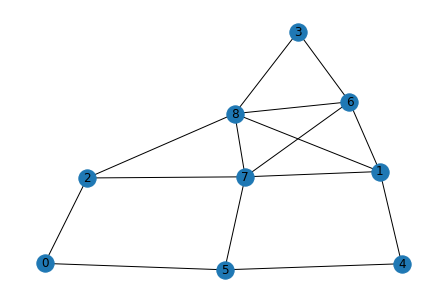

In [188]:
G_list, M_a, M_i = generate_graph() # wywołanie funkcji generującej graf

G = nx.Graph()
G.add_nodes_from(np.arange(SIZE))
G.add_edges_from(G_list)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

Jeśli <b>$A$</b> jest macierzą sąsiedztwa grafu skierowanego <b>$G$</b>, to macierz <b>$A^{n}$</b> (<b>$n$</b>-ta potęga macierzy <b>$A$</b>) ma następującą interpretację: <b>$a_{ij}$</b> oznacza liczbę ścieżek długości <b>$n$</b> z wierzchołka <b>$i$</b> do wierzchołka <b>$j$</b>.
Gdy jednak zastanowimy się każdy graf nieskierowany jest równocześnie grafem skierowanym którego wszystkie krawędzie sa w obie strony.

- Zaimplementuj metodę wyznaczania długości ścieżki (rozumianej jako liczba krawędzi na ścieżce) między dwoma zadanymi wierzchołkami grafu. Polecenie wykonaj przez odpowiednią manipulację (np. potęgowanie) macierzy sąsiedztwa.

In [227]:
def get_path_len(i, j, l, A_matrix):
    """
    Wyznaczanie ścieżki: funkcja zwraca ile ścieżek konkretnych długości jest miedzy 2 zadanymi wierzchołkami
    :param i: wierzchołek pozątkowy
    :param j: wierzchołek końcowy
    :param l: maksymalna długość która nas interesuje
    :param A_matrix: macierz sąsiedztwa
    :return list[int int] paths: [(długość ścieżki, ile jest takich ścierzek)]
    """
    paths = []

    for n in range(l):
        p = int(np.linalg.matrix_power(A_matrix, n)[i, j])
        if p > 0:
            paths.append((n, p))
            
    return paths

# sprawdzamy ścieżki kolejnych długość dla dwóch wybranych wierzchołków
pths = get_path_len(1, 5, 10, M_a)
for p in pths:
    print('Długość:', p[0], ' ilość ścierzek tej długości:', p[1])

pths

Długość: 2  ilość ścierzek tej długości: 2
Długość: 3  ilość ścierzek tej długości: 2
Długość: 4  ilość ścierzek tej długości: 22
Długość: 5  ilość ścierzek tej długości: 48
Długość: 6  ilość ścierzek tej długości: 272
Długość: 7  ilość ścierzek tej długości: 810
Długość: 8  ilość ścierzek tej długości: 3626
Długość: 9  ilość ścierzek tej długości: 12376


[(2, 2), (3, 2), (4, 22), (5, 48), (6, 272), (7, 810), (8, 3626), (9, 12376)]


- #### Zaimplementuj analogiczną metodę weryfikacji spójności grafu (dopuszczalna jest modyfikacja macierzy sąsiedztwa na potrzeby tej weryfikacji).

<b> Graf spójny </b> - graf, w którym każdą parę wierzchołków łączy pewna ścieżka.

$A$ - macierz sąsiedztwa\
$D$ - macierz diagonalna - na diagonali znajduje się stopień (liczba sąsiadów każdego wierzchołka)\
$L$ - macierz Laplace'a
\
\
<b>$L = D - A$</b>

Gdy druga najmniejsza wartość własna macierzy Laplace'a jest większa od zera graf jest spójny w przeciwnym przypadku występują w nim niepołączone podgrafy.

In [190]:
def is_connected(A):
    D = np.zeros_like(A)
    d_temp =  A @ np.ones_like(A)
    for n in range(len(A)):
        D[n, n] = d_temp[n, n]


    L = D - A

    # jeśli wartość Fidlera > 0
    # wartość fidlera -  druga najmniejsza wartość własna
    eig_vec = np.sort(np.linalg.eig(L)[0])
    if eig_vec[1] > 0:
        return True
    else:
        return False


In [191]:
# sprawdzenie czy graf nieksierowany jest spójny
is_connected(M_a)

True

### Stworzenie grafu skierowanego ###

In [192]:
def generate_digraph(SIZE=SIZE, with_weight=False):
    """
    Funkcja generuje i zapisuje w 3 formach wierzchołki grafu skierowanego i relacje między nimi
    :return tuple: (lista wierzchołków i krawędzi, macierz sąsiedztwa, macierz incydencji)
    """
    g_matrix = np.zeros((SIZE, SIZE))
    inc_matrix = []
    g_list = []


    for n in range(SIZE):
        # ustawienie zer na diagonali poprzez pętle od n+1
        for m in range(n + 1, SIZE):
            weight = np.random.randint(0, 10)
            if weight and n != m and np.random.normal(1, 2) > 0:
                # macierz sąsiedstwa
                g_matrix[n, m] = weight

                #lista  krawędzi
                g_list.append((n, m))
                
                # macierz incydencji
                temp_vec = np.zeros(SIZE)
                temp_vec[n], temp_vec[m] = 1, 1
                inc_matrix.append(temp_vec)

    return g_list, g_matrix, inc_matrix

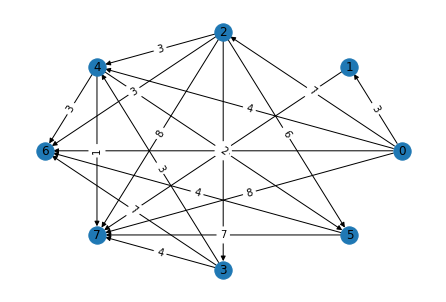

In [199]:
dg_list, dm_a, dm_i = generate_digraph(8) # wywołanie funkcji generującej graf
weights = {}
for i in range(len(dm_a)):
    for j in range(len(dm_a)):
        if dm_a[i, j]:
            weights[(i, j)] = {'weight': int(dm_a[i, j])}

G = nx.DiGraph()
G.add_edges_from(dg_list)
nx.set_edge_attributes(G, values=weights)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

<b> Potęgowanie macierzy sąsiedstwa </b>

Jeśli <b>$A$</b> jest macierzą sąsiedztwa grafu skierowanego <b>$G$</b>, to macierz <b>$A^{n}$</b> (<b>$n$</b>-ta potęga macierzy <b>$A$</b>) ma następującą interpretację: <b>$a_{ij}$</b> oznacza liczbę ścieżek długości <b>$n$</b> z wierzchołka <b>$i$</b> do wierzchołka <b>$j$</b>.

- Zaimplementuj metodę wyznaczania długości ścieżki (rozumianej jako liczba krawędzi na ścieżce) między dwoma zadanymi wierzchołkami grafu. Polecenie wykonaj przez odpowiednią manipulację (np. potęgowanie) macierzy sąsiedztwa.

In [200]:
def get_path_len_digraph(i, j, l):
    """
    Wyznaczanie ścieżki: funkcja zwraca ile ścieżek konkretnych długości jest miedzy 2 zadanymi wierzchołkami
    :param i: wierzchołek pozątkowy
    :param j: wierzchołek końcowy
    :param l: maksymalna długość która nas interesuje
    :return list[int int] paths: [(długość ścieżki, ile jest takich ścierzek)]
    """
    paths = []

    for n in range(l):
        p = int(np.linalg.matrix_power(dm_a, n)[i, j])
        if p > 0:
            paths.append((n, p))
            
    return paths


In [233]:
pths = get_path_len_digraph(0, 7, 6)
pths

[(1, 8), (2, 78), (3, 539), (4, 420), (5, 1764)]

In [202]:
print("Czy graf skierowany jest silnie połaczony?")
is_connected(dm_a)

Czy graf skierowany jest silnie połaczony?


False

## Zadanie 2 - przeszukiwanie ##

<b> Graf spójny </b> - graf, w którym każdą parę wierzchołków łączy pewna ścieżka.


<b> Drzewo</b> - graf jest drzewem gdy jest acykliczny i spójny, czyli taki graf, że z każdego wierzchołka drzewa można dotrzeć do innego(spójność) tylko jednym sposobem (acykliczność, brak możliwości zrobienia pętli).

<b>Las</b> - graf, którego kazdy spójny podgraf jest drzewem. Równoważnie można zdefiniować las jako acykliczny graf nieskierowany. Wtedy jego spójne składowe są drzewami.

In [301]:
"""Procedura sprawdzania lasu"""
"""1 bierzemy dowolny węzeł,
  2 sprawdzamy, czy jest to drzewo (np. bfs-em)
  3 jeśli nie jest -> to nie jest las
  4 jeśli jest, to usuwamy znalezione węzły
  5 jeśli coś nam zostało, to powtarzamy od początku (dla pozostałego grafu)
  6 jeśli nic nam nie zostało, to początkowy graf był lasem """

# używany zapis grafu = wierzchołki + krawędzie

def removeNode(graph, node):
  nodes, edges = graph

  new_nodes = [n for n in nodes if n != node]
  new_edges = [e for e in edges if not edgeContains(e, node)]
  return new_nodes, new_edges

def removeNodes(graph, nodes): #funkcja pomocnicza do usuania drzewa z grafu
  g = graph
  for n in nodes:
    g = removeNode(g, n)
  return g

def theOtherNode(edge, node_src):
  if edge[0] == node_src:
    return edge[1]
  return edge[0]

def edgeContains(edge, node_src):
  if edge[0] == node_src:
    return True
  return edge[1] == node_src

def adjacentNodes(graph, node_src): #funkcja pomocnicza ktora zwraca sasiednie wiercholki
  _nodes, edges = graph
  return [theOtherNode(e, node_src) for e in edges if edgeContains(e, node_src)]

def toCheck(node_src, to_check):
  return len([n for n in to_check if n[0] == node_src]) > 0

def bfs(graph, start_node, display = False):
  _nodes, edges = graph

  visited_nodes = []
  nodes_to_check = [(start_node, None)]
  tree_detector = True
  while len(nodes_to_check) > 0:
    the_node, parent_node = nodes_to_check.pop() #usuwamy odwiedzony node 
    visited_nodes.append(the_node) # i dodajemy go do odwiedzonych
    if display:
      plotgraph(graph, visited_nodes) 

    adj_nodes = adjacentNodes(graph, the_node)
    new_nodes = [n for n in adj_nodes if n not in visited_nodes]

    # sprawdzanie drzewa - przy okazji
    if tree_detector == True:
      problem_nodes = [n for n in adj_nodes if n in visited_nodes and n != parent_node]
      if len(problem_nodes) > 0:
        tree_detector = False

    new_nodes = [(n, the_node) for n in new_nodes if not toCheck(n, nodes_to_check)]
    # wszerz - nowe węzły z lewej strony dodajemy
    new_nodes.extend(nodes_to_check)
    nodes_to_check = new_nodes

  return visited_nodes, tree_detector

def plotgraph(graph, visited_nodes):
  colors = []
  G = nx.Graph()
  VV = [1, 2, 3, 4, 5, 6]
  for v in VV:
    G.add_node(v)
  G.add_edges_from([(1,2), (1,5), (2,3), (2,5), (3,4), (5,4), (4,6)])
  for node in G.nodes():
    if node in visited_nodes:
      colors.append("orange")
    else:
      colors.append("blue")
  pos=nx.circular_layout(G)
  nx.draw_networkx_nodes(G, pos, node_size=500, node_color = colors)
  nx.draw_networkx_labels(G,pos)
  nx.draw_networkx_edges(G,pos)
  plt.show()





def dfs(graph, start_node): 
  _nodes, edges = graph

  visited_nodes = []
  nodes_to_check = [start_node]
  while len(nodes_to_check) > 0:
    the_node = nodes_to_check.pop()
    visited_nodes.append(the_node)
    plotgraph(graph, visited_nodes)

    new_nodes = [n for n in adjacentNodes(graph, the_node) if n not in visited_nodes]
    # wgłąb - nowe węzły z prawej strony dodajemy
    new_nodes = [n for n in new_nodes if n not in nodes_to_check]
    nodes_to_check.extend(new_nodes)

  return visited_nodes

def isConnected(graph):
  nodes, _edges = graph
  visited, _tree = bfs(graph, nodes[0])
  return len(visited) == len(nodes)

def isForest(graph):
  nodes, _edges = graph

  # sprawdzamy, czy graf zawiera drzewo
  tree_nodes, is_tree = bfs(graph, nodes[0])

  # nie drzewo = nie las
  if is_tree == False:
    return False

  # usuwamy drzewo z grafu
  new_graph = removeNodes(graph, tree_nodes)

  # zostały nam jakieś węzły?
  nodes, _edges = new_graph
  if len(nodes) == 0:
    return True

  # rekurencyjnie sprawdzamy, czy pozostały graf jest lasem
  return isForest(new_graph)


graph = ( [1, 2, 3, 4, 5, 6], [(1,2), (1,5), (2,3), (2,5), (3,4), (5,4), (4,6)] )

forest_graph = ( [1, 2, 3, 4], [(1,2), (3,4)] )

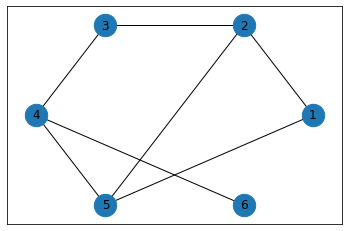

In [302]:
G = nx.Graph()
VV = [1, 2, 3, 4, 5, 6]
for v in VV:
  G.add_node(v)
G.add_edges_from([(1,2), (1,5), (2,3), (2,5), (3,4), (5,4), (4,6)])
pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edges(G,pos)
plt.show()

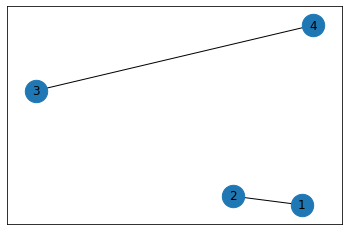

In [303]:
G = nx.Graph()
VV = [1, 2, 3, 4]
for v in VV:
  G.add_node(v)
G.add_edges_from([(1,2), (3,4)])
pos=nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edges(G,pos)
plt.show()

### True = drzewo, False = nie drzewo

## BFS - przeszukiwanie w szerz##

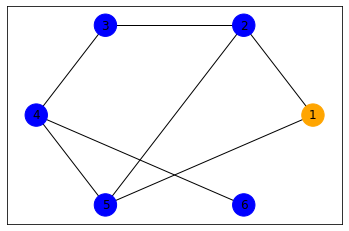

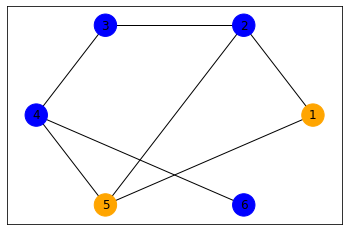

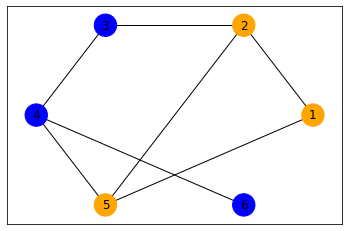

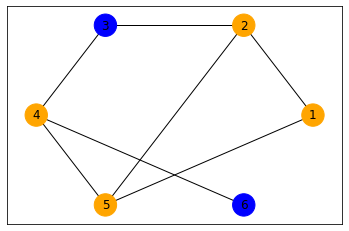

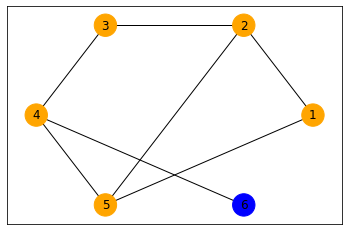

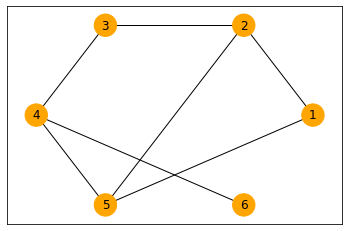

([1, 5, 2, 4, 3, 6], False)
True


In [304]:
print( bfs(graph, 1, True) )
print( isConnected(graph) )

## DFS = prrzeszukiwanie w głąb ##

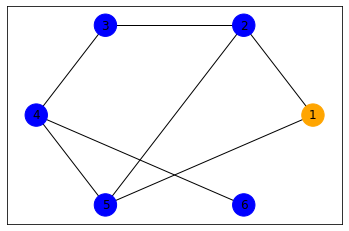

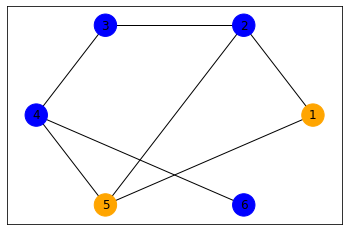

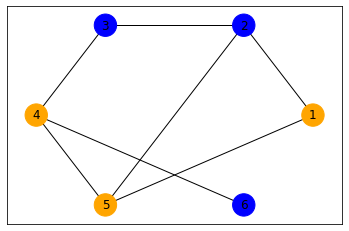

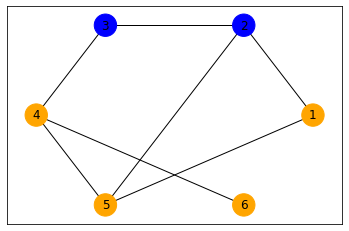

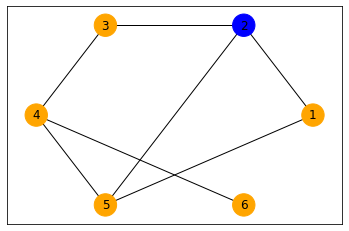

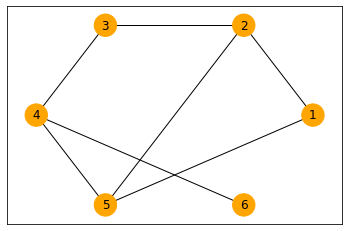

[1, 5, 4, 6, 3, 2]
Sprawdzam czy graf jest lasem False
Sprawdzam czy graf jest lasem True


In [305]:
print( dfs(graph, 1) )
print( 'Sprawdzam czy graf jest lasem', isForest(graph) )
print( 'Sprawdzam czy graf jest lasem', isForest(forest_graph) )

## Zadanie 3 - sortowanie topologiczne ##

Dany jest zbiór operacji (np. czynności do wykonania), których zależności kolejnościowe są zadane za pomocą skierowanego i acyklicznego grafu. Dokładniej, wierzchołki reprezentują operacje, a istnienie krawędzi między parą wierzchołków wymusza wykonanie poprzednika przed następnikiem. Każdej operacji przypisano nieujemny czas wykonania.
- Zaimplementuj metodę tworzącą i wyświetlającą tak zadany zbiór operacji.
- Zaimplementuj metodę sortowania topologicznego operacji.
- Wylicz (i wyświetl na grafie) czas rozpoczęcia każdej operacji, zakładając, że są one wykonywane zgodnie z wyznaczonym porządkiem, nie ma między nimi przerw, a pierwsze z nich rozpoczyna się w chwili 0.
- Rozwiąż problem minimalizacji czasu rozpoczęcia wybranej operacji, tzn. dla wskazanej operacji wygeneruj takie sortowanie topologiczne grafu, przy którym wskazana operacja rozpocznie się możliwie najwcześniej. Do ustalania kolejności wykorzystaj odpowiednio pokierowane przeszukiwanie grafu.


<b>Uwaga</b>: Dla następnych zadań, parametry wszystkich grafów/problemów, np. liczba wierzchołków i wagi krawędzi, zapisz w osobnym pliku.

In [276]:
def generate_dag(num_of_nodes):
    graph = nx.DiGraph()

    nodes = np.arange(0, num_of_nodes)
    edges = []
    for n in range(num_of_nodes):
        edges.append(np.random.choice(nodes, 2))

    graph.add_edges_from(edges)

    if not nx.is_directed_acyclic_graph(graph):
        return generate_dag(num_of_nodes)
    
    else:
        return graph

In [286]:
g = generate_dag(12)

In [287]:
attributes = {}

for node in g.nodes():
    attributes[node] = {'time': np.random.randint(1, 10)}

{}

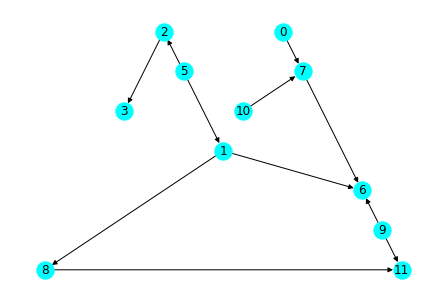

In [288]:
nx.set_node_attributes(g, attributes)
pos = nx.planar_layout(g)
nx.draw(
    g,
    pos=pos,
    with_labels=True,
    node_color='cyan'
)

labels = nx.get_edge_attributes(g, 'time')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)

In [297]:
def topo_sort(graph, priority=None):
    """
    Funkcja przeprowadza sortowanie topologiczne
    :param graph: obiekt graf z biblioteki networkX
    """
    l = []  # lista na posortowane elementy
    in_nodes = [edge[1] for edge in graph.edges()]  # lista węzłów które mają poprzednika
    s = [n for n in graph.nodes() if n not in in_nodes]  # lista z węzłami które nie mają poprzednika

    while s:
        if priority in s:
            n = priority
            s.remove(priority)
        else:
            n = s.pop(0)

        l.append(n)
        edges = list(graph.out_edges(n)).copy()
        
        for e in edges:
            m = e[1]
            graph.remove_edge(*e) # * odpakowuje wartości z tupla


            # sprawdzamy czy wierzchołek z usuniętej krawędzi ma poprzedników
            if not graph.in_degree(m):
                #jeśli nie dodajemy do s
                s.append(m)

    if graph.edges():
        return 'error - graf ma cykle'
    else:
        return l

In [298]:
def count_time(graph, sorted_nodes):
    total_time = 0

    for n in sorted_nodes:
        total_time += graph.nodes()[node]['time']
        
    return total_time

In [299]:
snodes = topo_sort(g.copy(), priority=5)
print('Posortoane węzły:', snodes)
print('Całkowity czas:', count_time(g, snodes))


Posortoane węzły: [5, 9, 10, 0, 1, 2, 7, 8, 3, 6, 11]
Całkowity czas: 44


In [300]:
snodes = topo_sort(g.copy())
print('Posortoane węzły:', snodes)
print('Całkowity czas:', count_time(g, snodes))

Posortoane węzły: [9, 5, 10, 0, 1, 2, 7, 8, 3, 6, 11]
Całkowity czas: 44


## Zadanie 4 - drzewa rozpinające ##

In [306]:
import networkx as nx
import time
import random
import matplotlib.pyplot as plt

0 {8: 87, 3: 36}
1 {7: 67, 5: 38}
2 {9: 25, 4: 66}
3 {0: 36, 8: 16}
4 {2: 66}
5 {1: 38}
6 {7: 33, 9: 54}
7 {1: 67, 6: 33, 8: 95}
8 {0: 87, 7: 95, 3: 16}
9 {2: 25, 6: 54}


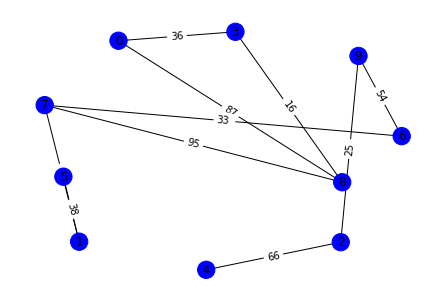

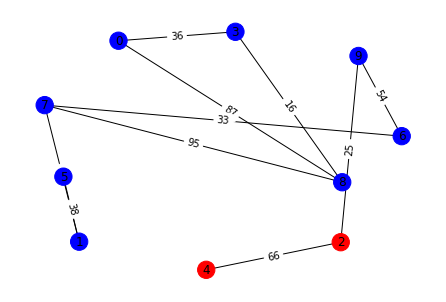

2


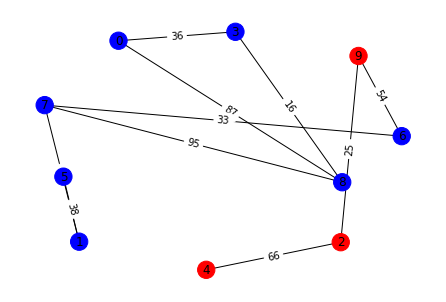

9


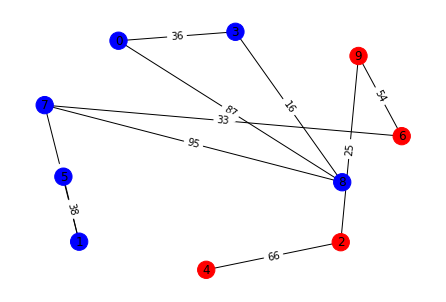

6


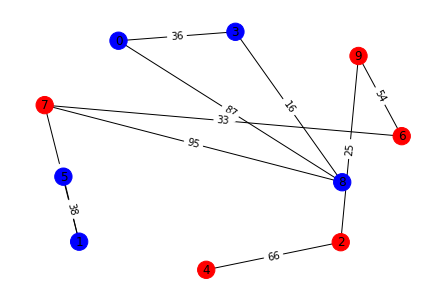

7


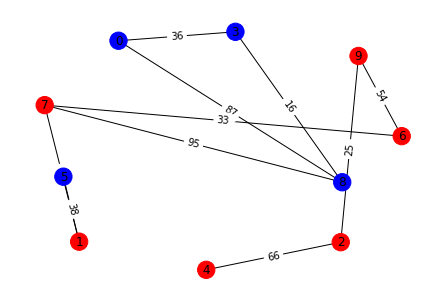

1


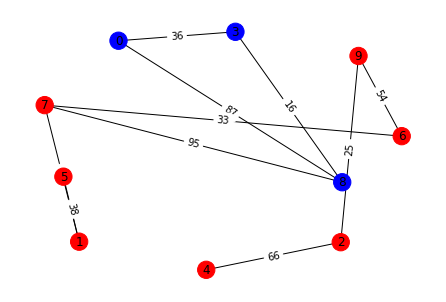

5


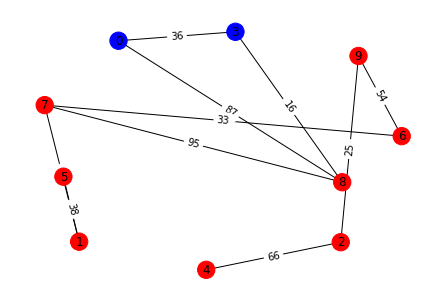

8


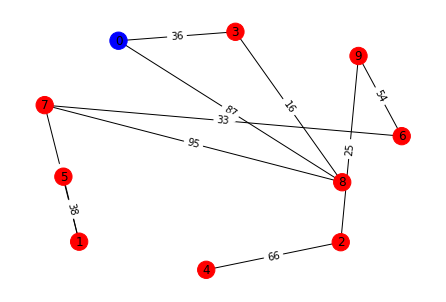

3


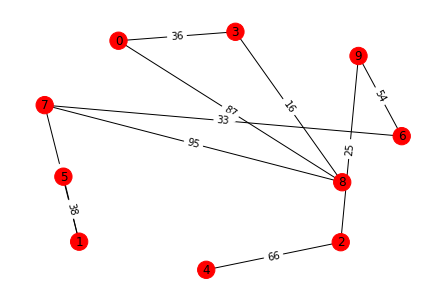

0
[4, 2, 9, 6, 7, 1, 5, 8, 3, 0]


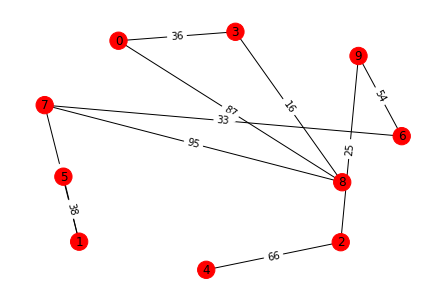

In [311]:
random.seed()


class Node:

    def __init__(self, data, color='blue'):
        self.data = data
        self.color = color
        self.connections = {}

    def add_connection(self, who):
        wage = random.randint(0, 100)
        self.connections[who.data] = wage
        who.connections[self.data] = wage

    def get_color(self):
        return self.color

    def get_wage(self, n2):
        return self.connections[n2]


class Graph:

    def __init__(self, nodes):
        self.nodes = nodes
        self.n = len(nodes)

    def search_nodes(self, d):
        for n in self.nodes:
            if n.data == d:
                return n

    def make_connections(self, limit):
        for i in range(limit):
            for node in self.nodes:
                # make sure not to connect 1 to 1
                node.add_connection(random.choice([n for n in self.nodes if n != node and n.data not in n.connections]))

        # do not connect same elements twice (making a set)
        # for node in self.nodes:
            # node.connections = dict(set(node.connections))

    def show(self, limit=2):
        self.make_connections(limit)
        for n in self.nodes:
            print(n.data, n.connections)

    def better_show(self, E=None, gpos=None):
        if not E:
            E = nx.Graph()

        # need a better way for color map
        data_nodes = []
        for n in self.nodes:
            data_nodes.append(n.data)
        E.add_nodes_from(data_nodes)

        # setting connections and color map
        color_map = []
        for n in self.nodes:
            for connection in n.connections:
                n2 = self.search_nodes(connection)
                E.add_edge(n.data, n2.data, weight=n.get_wage(n2.data))
            color_map.append(n.color)

        # print(color_map)
        # g_pos = gpos
        nx.draw(E, with_labels=True, node_color=color_map, pos=gpos)
        labels = nx.get_edge_attributes(E, 'weight')
        nx.draw_networkx_edge_labels(G, gpos, edge_labels=labels)
        plt.show()

    # color a single node
    def color_node(self, n, new_color='red'):
        self.search_nodes(n).color = new_color

    def kruskal(self, animate=False, gpos=None, E=None):
        conns = []

        def delete_same(arr1, arr2):
            if arr1[0] == arr2[1] and arr2[0] == arr1[1]:
                return True

        # add all connections
        for n in self.nodes:
            for cons in n.connections:
                conns.append([n.data, cons, n.connections[cons]])

        # remove duplicateses
        for i in conns:
            for j in conns:
                if delete_same(i, j):
                    conns.remove(j)
        print(conns)

        # sort connections
        conns = sorted(conns, key=lambda x: x[2])
        print(conns)

        result = []
        for con in conns:
            if con[0] or con[1] not in result:
                result.append(con[0])
                result.append(con[1])
                self.color_node(con[0])
                self.color_node(con[1])
                if animate:
                    self.better_show(E=E, gpos=gpos)
                    time.sleep(0.5)
            result = list(set(result))

        for con in conns:
            if con not in result:
                E.remove_edge(con[0], con[1])

        self.better_show(E=E, gpos=gpos)
        time.sleep(2)

    def prim(self, animate=False, gpos=None, E=None):
        start = random.choice(self.nodes)
        result = [start.data]

        def mini_prim(current, parent):
            if not current:
                return None
            conns = [] #sasiedzi rozpatrywanego wierzcholka
            for cons in current.connections:
                conns.append([current.data, cons, current.connections[cons]])

            conns = sorted(conns, key=lambda x: x[2])

            for i in conns:
                if i[1] != parent.data and i[1] not in result:
                    result.append(i[1])
                    self.color_node(current.data)
                    self.color_node(parent.data)
                    self.color_node(i[1])
                    if animate:
                        self.better_show(E=E, gpos=gpos)
                        time.sleep(1)
                        print(i[1])
                    mini_prim(self.search_nodes(i[1]), current)
            return None

        mini_prim(start, start)
        print(result)
        return result



num = 10
nodes_list = []
n_l_d = []
for i in range(num):
    nodes_list.append(Node(i))
    n_l_d.append(nodes_list[i].data)

G = Graph(nodes_list)
# G.color_node(5)
G.show(1)
E = nx.Graph()
E.add_nodes_from(n_l_d)
g_pos = nx.spring_layout(E)
G.better_show(E=E, gpos=g_pos)
G.prim(E=E, gpos=g_pos, animate=True)
G.better_show(E=E, gpos=g_pos)

0 {3: 53}
1 {6: 94}
2 {8: 18, 4: 25, 9: 83}
3 {0: 53, 4: 14}
4 {3: 14, 2: 25}
5 {7: 11, 8: 37}
6 {1: 94, 9: 83}
7 {5: 11, 9: 62}
8 {2: 18, 5: 37}
9 {6: 83, 7: 62, 2: 83}


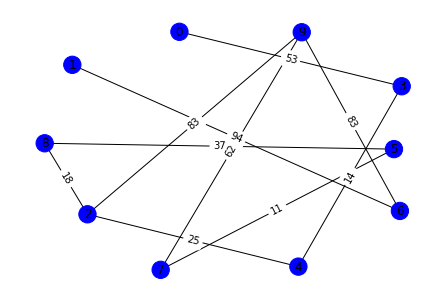

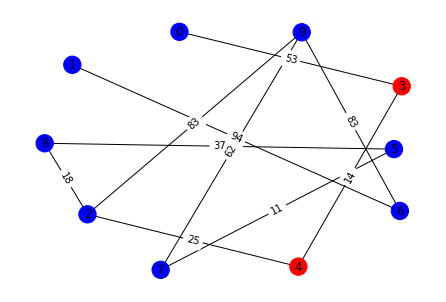

4


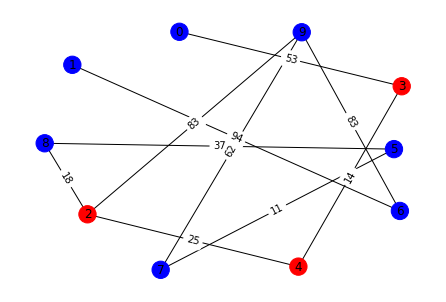

2


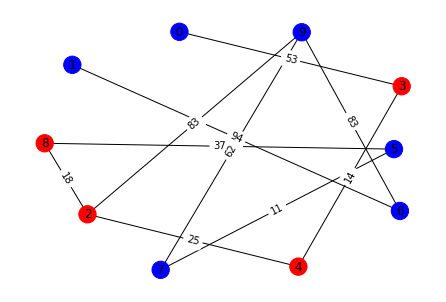

8


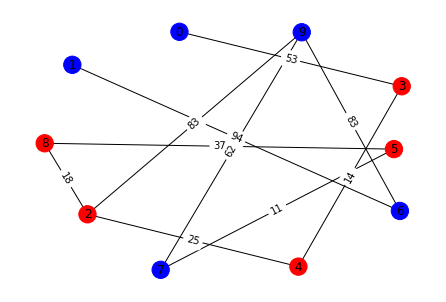

5


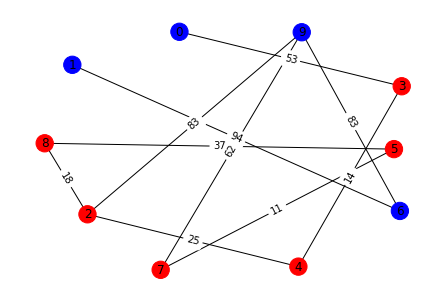

7


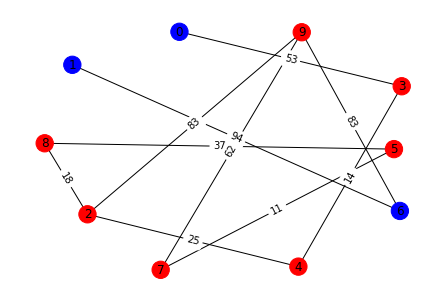

9


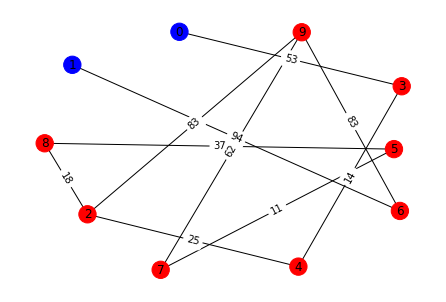

6


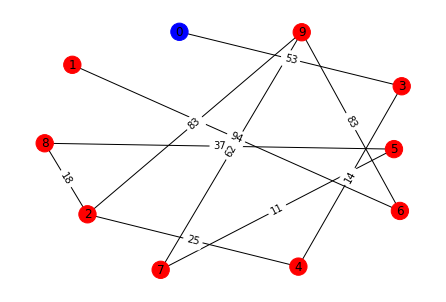

1


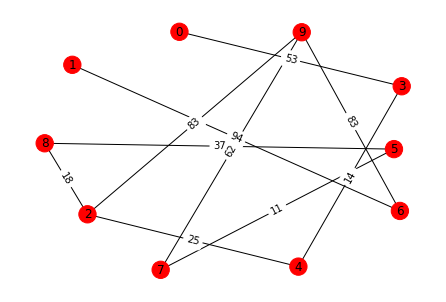

0
[3, 4, 2, 8, 5, 7, 9, 6, 1, 0]


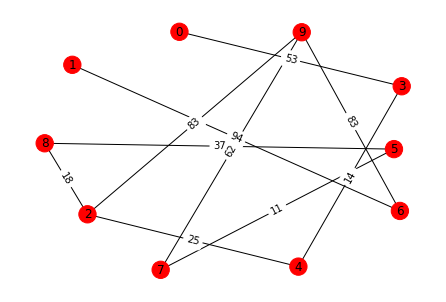

In [312]:
num = 10
nodes_list = []
n_l_d = []
for i in range(num):
    nodes_list.append(Node(i))
    n_l_d.append(nodes_list[i].data)

G = Graph(nodes_list)
# G.color_node(5)
G.show(1)
E = nx.Graph()
E.add_nodes_from(n_l_d)
g_pos = nx.spring_layout(E)
G.better_show(E=E, gpos=g_pos)
G.prim(E=E, gpos=g_pos, animate=True)
G.better_show(E=E, gpos=g_pos)


# Algorytm Kruskala
utwórz las F (zbiór drzew), w którym każdy wierzchołek grafu jest oddzielnym drzewem

utwórz zbiór S zawierający wszystkie krawędzie grafu

podczas gdy S jest niepuste , a F jeszcze nie obejmuje
  
  usuń krawędź o minimalnej wadze z S
  
  jeśli usunięta krawędź łączy dwa różne drzewa, dodaj ją do lasu F , łącząc dwa drzewa w jedno drzewo

Po zakończeniu algorytmu las tworzy minimalny las obejmujący graf. Jeśli wykres jest połączony, las składa się z jednego składnika i tworzy minimalne drzewo opinające.

0 {7: 18, 6: 77}
1 {3: 24}
2 {3: 3}
3 {1: 24, 2: 3, 4: 57, 7: 91}
4 {3: 57, 7: 16, 9: 88}
5 {9: 96}
6 {0: 77}
7 {0: 18, 4: 16, 3: 91}
8 {9: 91}
9 {5: 96, 8: 91, 4: 88}


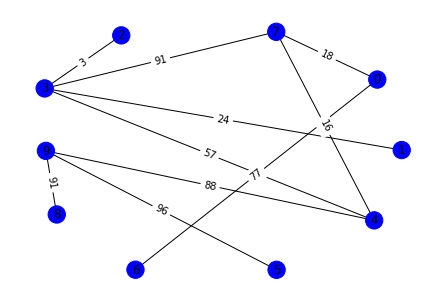

[[0, 7, 18], [0, 6, 77], [1, 3, 24], [2, 3, 3], [3, 4, 57], [3, 7, 91], [4, 7, 16], [4, 9, 88], [5, 9, 96], [8, 9, 91]]
[[2, 3, 3], [4, 7, 16], [0, 7, 18], [1, 3, 24], [3, 4, 57], [0, 6, 77], [4, 9, 88], [3, 7, 91], [8, 9, 91], [5, 9, 96]]


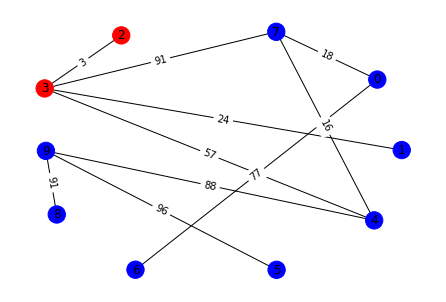

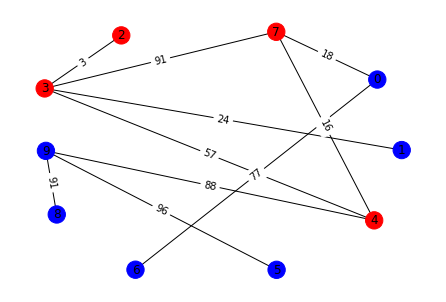

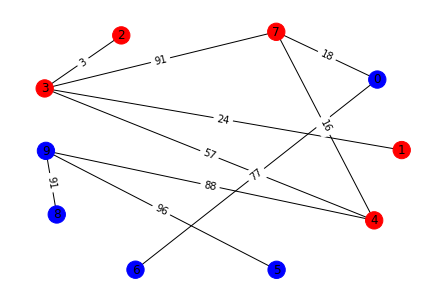

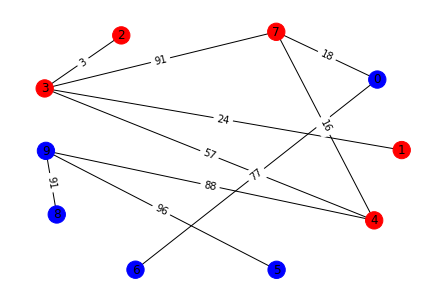

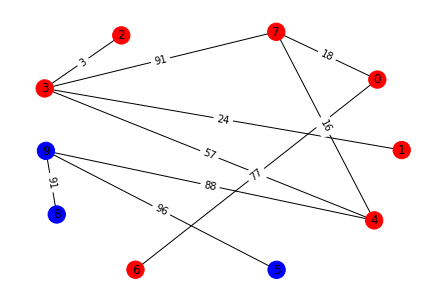

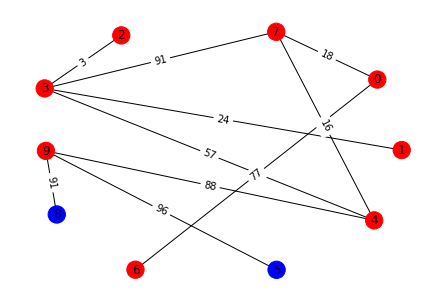

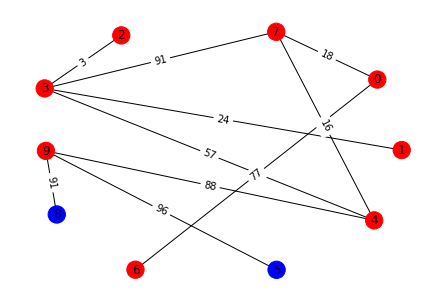

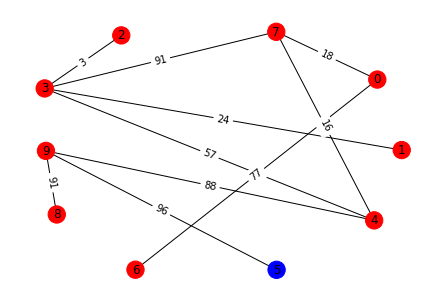

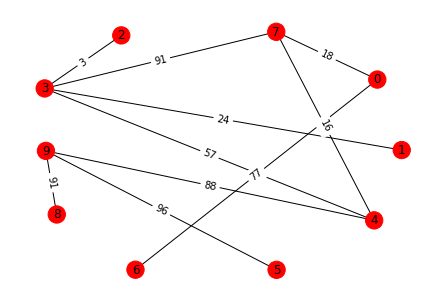

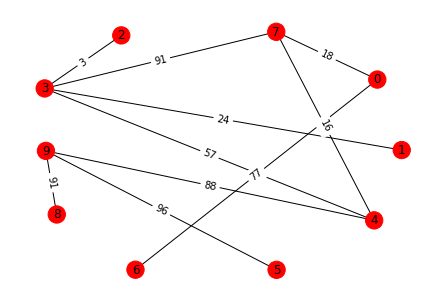

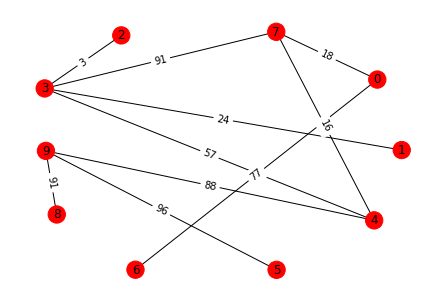

In [309]:
num = 10
nodes_list = []
n_l_d = []
for i in range(num):
    nodes_list.append(Node(i))
    n_l_d.append(nodes_list[i].data)

G = Graph(nodes_list)
# G.color_node(5)
G.show(1)
E = nx.Graph()
E.add_nodes_from(n_l_d)
g_pos = nx.spring_layout(E)
G.better_show(E=E, gpos=g_pos)
G.kruskal(E=E, gpos=g_pos, animate=True)
G.better_show(E=E, gpos=g_pos)

## Zadanie 5 - najkrósza ścieżka ##

Zaimplemenuj algorytm Dijkstry, w celu wyznaczenia najkrótszej ścieżki między dwoma wybranymi wierzchołkami w zadanym grafie. Wyświetl wyszukaną ścieżkę.

Zaimplementuj algorytm Floyda-Warshalla, w celu wyznaczenia najkrótszych ścieżek między wierzchołkami w zadanym grafie.

Wyświetl, na wykresie, czas działania obu algorytmów w zależności od rosnącej liczby krawędzi.

<b>Algorytm Dijkstry</b>

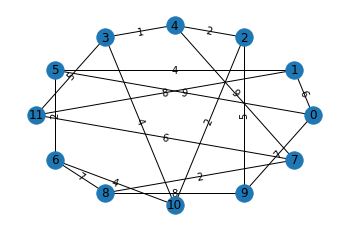

In [243]:
g = nx.random_regular_graph(3, 12)
edges = {}
for v in g.edges():
    edges[v] = {'weight': np.random.randint(1, 10)}
    
nx.set_edge_attributes(g, values=edges)
pos = nx.circular_layout(g)
nx.draw_networkx_labels(g, pos)
labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
nx.draw(g, pos)

In [244]:
def get_closest_vert(spt, q):
    """
    :param list spt: tabela odległości
    :param list q: kolejka nieodwiedzonych wierzchołków
    """
    closes_vert = 0
    m = max(spt) + 1 # aktualna minimalna odległość
    for v in q:
        if spt[v] < m:
            m = spt[v]
            closes_vert = v

    return closes_vert



def dijkstra(G, s, e):
    """
    :param object G: obiekt reprezentujący graf z bibliteki networkx
    :param int s: wierzchołek startowy
    :param int e: końcowy wierzchołek ścieżki
    """
    queue = list(G.nodes())
    shortest_path = [float('+inf')] * len(queue)
    prev_vert = [None] * len(queue)
    #queue.remove(s)
    shortest_path[s] = 0

    while queue:
        u = get_closest_vert(shortest_path, queue)
        queue.remove(u)

        for v in nx.neighbors(G, u):
            if v in queue:
                alt = shortest_path[u]  + G[u][v]['weight']

                if alt < shortest_path[v] and shortest_path[u] != float('+inf'):
                    shortest_path[v] = alt
                    prev_vert[v] = u

    temp = e
    path = []
    while temp:
        path.append(temp)
        temp = prev_vert[temp]
        


    return shortest_path[e], path

In [245]:
path_length, spath = dijkstra(g, 1, 4)
print('Długość:', path_length)
print('Ścieżka:', spath)

Długość: 14
Ścieżka: [4, 2, 10, 6, 5, 1]


In [246]:
color_map = ['orange' if node in spath else 'blue' for node in list(g.nodes())]
path_edges = [(spath[n], spath[n+1]) for n in range(len(spath) - 1)]

color_map_edges = {}
cmap_edges = []

for edge in g.edges():
    if edge in path_edges or tuple(reversed(edge)) in path_edges:
        cmap_edges.append('r')
    else:
        cmap_edges.append('b')

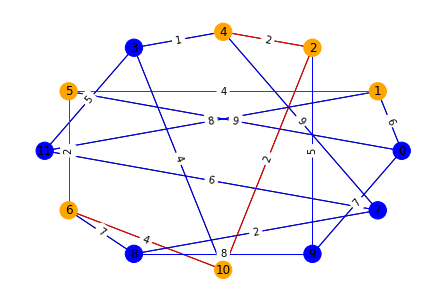

In [247]:
nx.set_edge_attributes(g, values=edges)
pos = pos
nx.draw(g, pos, with_labels=True, node_color=color_map)
labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edges(g, pos, edge_color=cmap_edges)
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
plt.show()


### <b>Algorytm Floyda-Warshalla </b> ###

In [249]:
def floyd_warshall(G):
    """
    Funkcja przeprowadzającca algorytm Floyda-Marshalla
    :param G: struktura grafu z pakietu networkx
    :return (dist, nxt): macierz dystansów, macierz sąsiedstwa
    """
    s = len(G.nodes())
    dist = np.array([float('+inf')] * s * s)
    dist = dist.reshape(s, s)
    nxt = np.array([None] * s * s)
    nxt = nxt.reshape(s, s)

    for edge in list(G.edges()):
        u, v = edge[0], edge[1]
        dist[u][v] = G[u][v]['weight']
        dist[v][u] = G[u][v]['weight']
        nxt[u][v] = v
        nxt[v][u] = u

    for v in list(G.nodes()):
        dist[v][v] = 0
        nxt[v][v] = v


    for k in range(s):
        for i in range(s):
            for j in range(s):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    nxt[i][j] = nxt[i][k]

    return dist, nxt


def path_fwa(u, v, N):
    """
    Funkcja wyznacza ścieżkę na podstawie macierzy z algorytmu
    """
    if N[u, v] == None:
        return []

    path = [u]
    while u != v:
        u = N[u][v]
        path.append(u)

    return path

In [251]:
_, n = floyd_warshall(g)

path_fwa(1, 4, n)

[1, 5, 6, 10, 2, 4]

In [252]:
times_dijkstar = []
times_floyd = []


for n in range(12, 100):
    try:
        nx.random_regular_graph(3, n)
    except:
        Exception
    else:
        g = nx.random_regular_graph(3, n)
        edges = {}
        for v in g.edges():
            edges[v] = {'weight': np.random.randint(1, 10)}
        nx.set_edge_attributes(g, values=edges)
        a, b = np.random.randint(0, n, 2)
        tic = timeit.default_timer()
        dijkstra(g, a, b)
        tac = timeit.default_timer()
        times_dijkstar.append(tac - tic)


        tic = timeit.default_timer()
        _, n = floyd_warshall(g)
        path_fwa(a, b, n)
        tac = timeit.default_timer()
        times_floyd.append(tac - tic)


Text(0, 0.5, 'czas[s]')

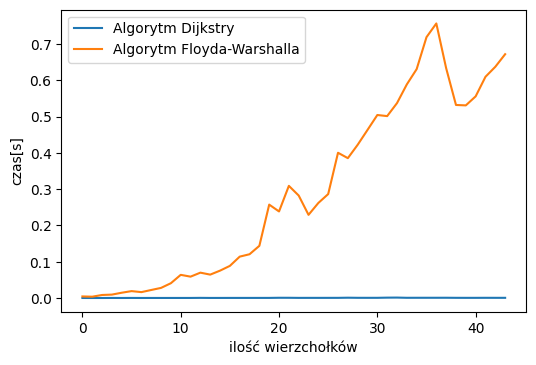

In [253]:
fig= plt.figure(dpi=100)
plt.plot(times_dijkstar, label='Algorytm Dijkstry')
plt.plot(times_floyd, label='Algorytm Floyda-Warshalla')
plt.legend()
plt.xlabel('ilość wierzchołków')
plt.ylabel('czas[s]')